In [188]:
from random import randint
from math import exp
import numpy as np
import networkx as nx

# Задачи

1. Проверить правильность выходных значений на нейронах
2. Проверить 

In [189]:
# скорость обучения
learning_rate = 0.1
# количество эпох
epoch = 4000

# входные значения
imput_values = np.array([[1, 1, 1], [0, 1, 1], [1, 0, 1], [0, 0, 1]], dtype=float)
# ожидаемое выходное значение нейрона
out_expected_values = np.array([0, 1, 1, 0], dtype=float)

# нейроны скрытых слоёв
neuron_hidden_layer_1 = np.array([0,0,0], dtype=float)
neuron_hidden_layer_2 = np.array([0,0], dtype=float)
# действительное выходное значение нейрона
out_actual_values = np.array([0], dtype=float)

# ошибка на нейроне от двух нейронов на втором слое к трем на первом слое [2][3]
neuron_hidden_layer_error_1 = np.array([
    [0,0,0],
    [0,0,0]
    ], dtype=float)

# ошибка на нейроне от выходного нейрона к двум неронам на втором слое [1][2]
neuron_hidden_layer_error_2 = np.array([0,0], dtype=float)

# веса к трем нейронам первого скрытого слоя от трех входных [3][3]
weights_1 = np.array([
    [randint(0,1000)/1000, randint(0,1000)/1000, randint(0,1000)/1000],
    [randint(0,1000)/1000, randint(0,1000)/1000, randint(0,1000)/1000],
    [randint(0,1000)/1000, randint(0,1000)/1000, randint(0,1000)/1000]
    ], dtype=float)

# веса к двум нейронам второго скрытого слоя от трех первого скрытого слоя [2][3]
weights_2 = np.array([
    [randint(0,1000)/1000, randint(0,1000)/1000, randint(0,1000)/1000],
    [randint(0,1000)/1000, randint(0,1000)/1000, randint(0,1000)/1000]
    ], dtype=float)

# веса к одному выходному нейрону от двух нейронов второго скрытого слоя[1][2]
weights_3 = np.array([randint(0,1000)/1000, randint(0,1000)/1000], dtype=float)

In [190]:
def sigmoid(x):
    '''
    Активационная функция сигмойда
    '''
    return 1 / (1 + exp(-x))

In [191]:
def activation_value(imput_values, weights, output_walues):
    '''
    Функция рассчета значения нейрона с применением активационной функции
    '''
    for i_neuron in imput_values:
        for i in range(len(output_walues)):
            output_walues[i] = sigmoid(np.sum(i_neuron * weights[i]))

    return output_walues

In [192]:
def running(
    imput_values, neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values,
    weights_1, weights_2, weights_3):
    '''
    Функция рассчета выходного значения и значений нейронов промежуточных слоёв
    '''
    neuron_hidden_layer_1 = activation_value(imput_values, weights_1, neuron_hidden_layer_1)
    neuron_hidden_layer_2 = activation_value(neuron_hidden_layer_1, weights_2, neuron_hidden_layer_2)
    out_actual_values = activation_value(neuron_hidden_layer_2, weights_3, out_actual_values)

    return neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values

In [193]:
def calculation_delta(value, error):
    '''
    Функция вычисления дельты
    '''
    weights_delta = error * sigmoid(value) * (1-sigmoid(value))
    return weights_delta

In [194]:
def correct_weight(weight, value, delta, learning_rate):
    '''
    Функция коррекции веса
    '''
    return weight - value * delta * learning_rate

In [195]:
def backpropagation_error(
    out_actual_values, out_expected_values,
    neuron_hidden_layer_2, neuron_hidden_layer_1, imput_values,
    weights_3, weights_2, weights_1,
    neuron_hidden_layer_error_2, neuron_hidden_layer_error_1,
    learning_rate = 0.3
    ):
    '''
    Функция обратного распределения ошибки
    '''
    # вычисляем ошибку на последнем нейроне
    first_error = out_actual_values[0] - out_expected_values

    # скорректируем третьи веса и посчитаем ошибку для каждого значения на втором скрытом слое
    for i in range(len(neuron_hidden_layer_2)):
        delta = calculation_delta(neuron_hidden_layer_2[i], first_error)
        weights_3[i] = correct_weight(weights_3[i], neuron_hidden_layer_2[i], delta, learning_rate)
        neuron_hidden_layer_error_2[i] = weights_3[i] * delta

    # скорректируем вторые веса и посчитаем ошибку для каждого значения на первом скрытом слое от второго скрытого слоя
    for i in range(len(neuron_hidden_layer_2)):
        for j in range(len(neuron_hidden_layer_1)):
            delta = calculation_delta(neuron_hidden_layer_1[j], neuron_hidden_layer_error_2[i])
            weights_2[i][j] = correct_weight(weights_2[i][j], neuron_hidden_layer_1[j], delta, learning_rate)
            neuron_hidden_layer_error_1[i][j] = weights_2[i][j] * delta
    
    # скорректируем первые веса
    for i in range(len(neuron_hidden_layer_error_1)):
        for j in range(len(neuron_hidden_layer_1)):
            for k in range(len(imput_values)):
                delta = calculation_delta(imput_values[k], neuron_hidden_layer_error_1[i][j])
                weights_1[j][k] = correct_weight(weights_1[j][k], imput_values[k], delta, learning_rate)
    
    return weights_1, weights_2, weights_3

In [196]:
def train(
    imput_values, out_actual_values, out_expected_values,
    neuron_hidden_layer_1, neuron_hidden_layer_2,
    weights_1, weights_2, weights_3,
    neuron_hidden_layer_error_1, neuron_hidden_layer_error_2,
    epoch, learning_rate):
    '''
    Функция тренировки последовательно вызывает функцию рассчета
    выходного значения и функцию обратного распределения ошибки
    для каждого imput_values
    '''
    for i in range(len(imput_values)):
        neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values = running(
            imput_values[i], neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values,
            weights_1, weights_2, weights_3
            )
        
        weights_1, weights_2, weights_3 = backpropagation_error(
            out_actual_values, out_expected_values[i],
            neuron_hidden_layer_2, neuron_hidden_layer_1, imput_values[i],
            weights_3, weights_2, weights_1,
            neuron_hidden_layer_error_2, neuron_hidden_layer_error_1,
            learning_rate
            )
    
        epoch -=1

    return weights_1, weights_2, weights_3

Проведем обучение нейросети за указанное количество эпох

In [197]:
while epoch != 0:
    '''
    вызываем функцию тренировки [epoch] кол-во раз
    '''
    weights_1, weights_2, weights_3 = train(
        imput_values, out_actual_values, out_expected_values,
        neuron_hidden_layer_1, neuron_hidden_layer_2,
        weights_1, weights_2, weights_3,
        neuron_hidden_layer_error_1, neuron_hidden_layer_error_2,
        epoch, learning_rate)

    epoch -=1

# Проверяем нейросеть

В этом блоке можно посмотреть как обучилась нейросеть.

Переменная imput_num определяет какие по счёту [0, 1, 2, 3] будут взяты входные значения из imput_values и out_expected_values

In [198]:
imput_num = 0

Введем значения в нейросеть и посмотрим что она выдаст.

In [199]:
neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values = running(
            imput_values[imput_num], neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values,
            weights_1, weights_2, weights_3
            )

Простенькая визуализация через print чтобы посмотреть веса, значения на скрытых слоях и выходное значение.

In [200]:
print('_'*len(str(imput_values[imput_num])))
print(imput_values[imput_num])
print('^'*len(str(imput_values[imput_num])))

print(weights_1)

print()
print('   | ')
print('   ▼ ')

print('_'*len(str(neuron_hidden_layer_1)))
print(neuron_hidden_layer_1)
print('^'*len(str(neuron_hidden_layer_1)))

print(weights_2)

print()
print('   | ')
print('   ▼ ')

print('_'*len(str(neuron_hidden_layer_2)))
print(neuron_hidden_layer_2)
print('^'*len(str(neuron_hidden_layer_2)))

print(weights_3)

print()
print('   | ')
print('   ▼ ')

print('_'*len(str(out_actual_values)))
print(out_actual_values)
print('^'*len(str(out_actual_values)))

__________
[1. 1. 1.]
^^^^^^^^^^
[[0.56635583 0.55821932 1.02259131]
 [0.23056203 0.20869358 0.35118104]
 [0.30561365 0.68077083 0.51639468]]

   | 
   ▼ 
__________________________________
[0.8954037  0.68792508 0.81798861]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
[[0.79344017 0.30077449 0.85512914]
 [0.33602616 0.08081243 0.36604149]]

   | 
   ▼ 
_______________________
[0.83125404 0.65484093]
^^^^^^^^^^^^^^^^^^^^^^^
[-3.13313145e-05  6.47586514e-01]

   | 
   ▼ 
____________
[0.49999487]
^^^^^^^^^^^^


Визуализация перцептрона через граф Networkx.

{('In_0', 'H_1.0'): Text(0.6, 0.0, '0.5663558344665554'),
 ('In_1', 'H_1.0'): Text(0.6, -0.4, '0.5582193200160673'),
 ('In_2', 'H_1.0'): Text(0.6, -0.8, '1.0225913124781065'),
 ('In_0', 'H_1.1'): Text(0.6, -0.6, '0.23056203017510665'),
 ('In_1', 'H_1.1'): Text(0.6, -1.0, '0.20869357549224649'),
 ('In_2', 'H_1.1'): Text(0.6, -1.4, '0.35118104214698576'),
 ('In_0', 'H_1.2'): Text(0.6, -1.2, '0.30561364860253515'),
 ('In_1', 'H_1.2'): Text(0.6, -1.6, '0.6807708345646104'),
 ('In_2', 'H_1.2'): Text(0.6, -2.0, '0.5163946814926123'),
 ('H_1.0', 'H_2.0'): Text(1.6, -0.3, '0.7934401670303108'),
 ('H_1.1', 'H_2.0'): Text(1.6, -0.7, '0.3007744940820325'),
 ('H_1.2', 'H_2.0'): Text(1.6, -1.1, '0.8551291425356202'),
 ('H_1.0', 'H_2.1'): Text(1.6, -0.8999999999999999, '0.3360261642936838'),
 ('H_1.1', 'H_2.1'): Text(1.6, -1.2999999999999998, '0.08081242589739224'),
 ('H_1.2', 'H_2.1'): Text(1.6, -1.7, '0.3660414859919808'),
 ('H_2.0', 'Out_0'): Text(2.5999999999999996, -0.8, '-3.133131453933284e-05

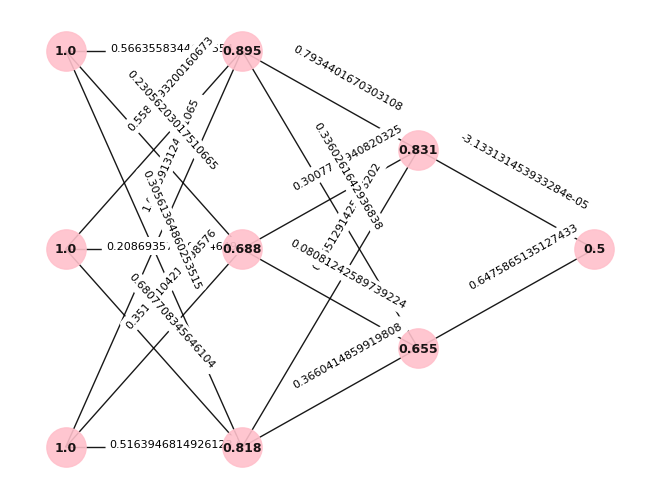

In [201]:
nodes = []
positions = {}
nodes_labels = {}
for i in range(len(imput_values[imput_num])):
    node = 'In_'+str(i)
    nodes.append(node)
    positions[node] = [0, -i]
    nodes_labels[node]= round(imput_values[imput_num][i],3)
for i in range(len(neuron_hidden_layer_1)):
    node = 'H_1.'+str(i)
    nodes.append(node)
    positions[node] = [1, -i]
    nodes_labels[node]= round(neuron_hidden_layer_1[i],3)
for i in range(len(neuron_hidden_layer_2)):
    node = 'H_2.'+str(i)
    nodes.append(node)
    positions[node] = [2, -i-0.5]
    nodes_labels[node]= round(neuron_hidden_layer_2[i],3)
for i in range(len(out_actual_values)):
    node = 'Out_'+str(i)
    nodes.append(node)
    positions[node] = [3, -1]
    nodes_labels[node]= round(out_actual_values[i],3)

edges = []
edges_labels = {}
for i in range(len(neuron_hidden_layer_1)):
    for j in range(len(imput_values[imput_num])):
        edge_value = ('In_'+str(j), 'H_1.'+str(i))
        edges.append(edge_value)
        edges_labels[edge_value] = weights_1[i][j]
for i in range(len(neuron_hidden_layer_2)):
    for j in range(len(neuron_hidden_layer_1)):
        edge_value = ('H_1.'+str(j), 'H_2.'+str(i))
        edges.append(edge_value)
        edges_labels[edge_value] = weights_2[i][j]
for i in range(len(out_actual_values)):
    for j in range(len(neuron_hidden_layer_2)):
        edge_value = ('H_2.'+str(j), 'Out_'+str(i))
        edges.append(edge_value)
        edges_labels[edge_value] = weights_3[j]

G = nx.Graph()

G.add_nodes_from(nodes)
G.add_edges_from(edges)

nx.draw(
    G, pos=positions, edge_color='black', linewidths=1,
    node_size=800, node_color='pink', alpha=0.9,
    labels=nodes_labels, font_size=9, font_weight = 'bold'
)

nx.draw_networkx_edge_labels(
    G, pos=positions,
    edge_labels=edges_labels,
    verticalalignment='baseline',
    label_pos=0.4, font_size=8)

In [202]:
out_actual_values

array([0.49999487])

In [208]:
activation_value([0.79309164, 0.7387744], [-0.0000190740691,  0.0000253490725], [0])

[0.4999964771415113]

Значения не сходятся. Где-то ошибка.

In [204]:
activation_value(neuron_hidden_layer_2, weights_3, [0])

[0.49999487074317756]

In [205]:
neuron_hidden_layer_2

array([0.83125404, 0.65484093])

In [206]:
weights_3

array([-3.13313145e-05,  6.47586514e-01])

In [207]:
out_actual_values

array([0.49999487])